# Projeto Ciência de Dados - Previsão de Vendas

- O desafio é conseguir prever as vendas que serão obtidas em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar Bibliotecas

In [4]:
#######################  Instalar as Bibliotecas caso não estejam instaladas  #######################
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#### Importar a Base de dados

In [59]:
tabela = pd.read_csv("advertising.csv")
#Neste caso a base de dados não precisa ser tratada

#### Análise Exploratória
- Tentar visualizar como as informações de cada item estão distribuídas
- Ver a correlação entre cada um dos itens

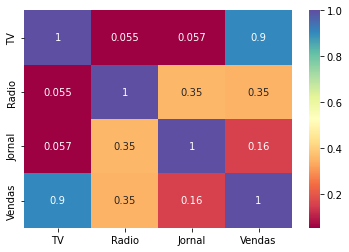

In [60]:
sns.heatmap(tabela.corr(), cmap = ("Spectral"), annot=True)
plt.show()

#### Preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [110]:
y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [111]:
LR_model = LinearRegression()
RF_model = RandomForestRegressor()

LR_model.fit(x_train, y_train)
RF_model.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- O R² -> diz a % de acerto de cada modelo

In [112]:
predict_LR = LR_model.predict(x_test)
predict_RF = RF_model.predict(x_test)

print(metrics.r2_score(y_test, predict_LR))
print(metrics.r2_score(y_test, predict_RF))

#Modelo de RandomForest mais preciso

0.9071151423684273
0.9645348606527295


#### Visualização Gráfica das Previsões

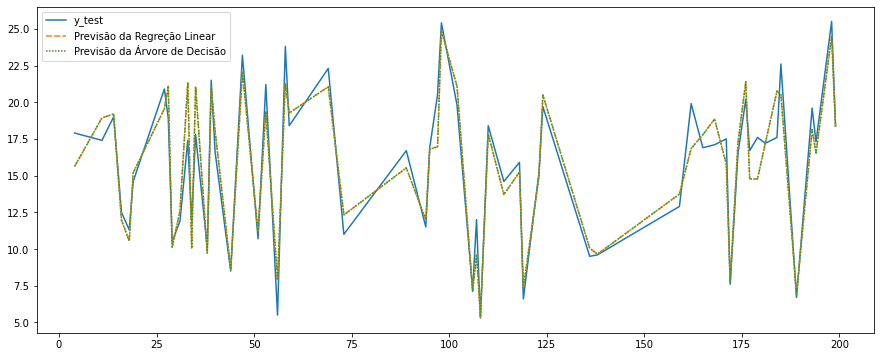

In [113]:
tabela_aux = pd.DataFrame()
tabela_aux["y_test"] = y_test
tabela_aux["Previsão da Regreção Linear"] = predict_LR
tabela_aux["Previsão da Árvore de Decisão"] = predict_LR

plt.figure(figsize = (15, 6))
sns.lineplot(data = tabela_aux)
plt.show()

#### Como fazer uma nova previsão?

In [117]:
tabela_nova = pd.read_csv("novos.csv")
display(tabela_nova)
predict_nova = RF_model.predict(tabela_nova)

print(predict_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.548  8.703 19.971]
